# Starter point for the Machine Learning element of the coursework

This part of the coursework uses the same dataset as used in the first part of the coursework. In this part of the coursework you are going to develop three machine learning models for predicting the **'median_house_value'** from the dataset. The focus here is on comparing the different models and looking at how you can improve them. You do not need to use a cleaned up version of the data (i.e. perform outlier removal in advance) but you may if you wish although please comment on this.

Everything needed to complete this assignment should be available in the course slides, but external information from the interenet may prove useful and is encouraged. Please provide citations for resources used in the course.

### Load libraries and read in data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

### (Optional) Preprocessing and Data Exploration
What data exploration would you perform to get a sense of the data, and what preprocessing outside of feature normalasation would you perform? This section is an optional place for students to do additional work on the data before progressing into the assignment proper.

**Data Exploration**

In [ ]:
houses.describe()


,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000


---
The min and max in this output gives me insights into the range of the data. The results shows the houses range from 15,000 to 500,000 dollars. Understanding the general range of the data is helpful in setting the baseline expectations for my model's predictions.

These statistics are also critical for feature scaling and normalization. This will help me with both feature extraction and normalisation.

---

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.050594
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

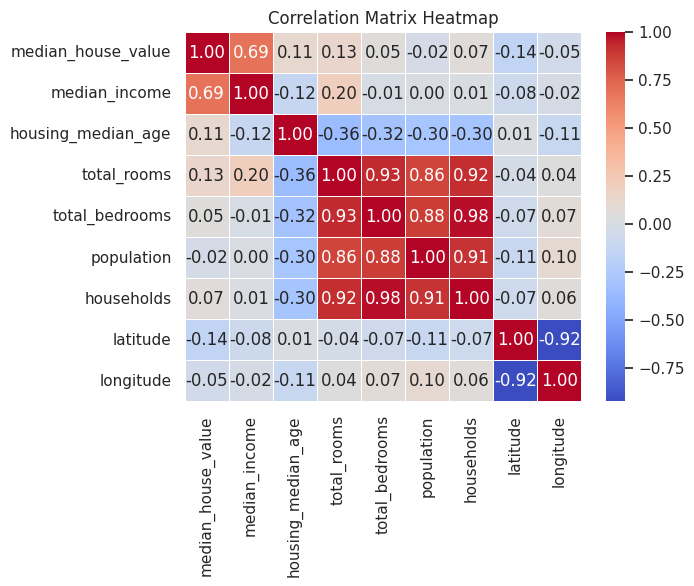

In [ ]:
correlation_matrix = houses.corr()
sns.set(style='white')
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', fmt='.2f', linewidths=.5)
correlation_with_target = correlation_matrix['median_house_value'].abs().sort_values(ascending=False)
print(correlation_with_target)
plt.title('Correlation Matrix Heatmap')
plt.show


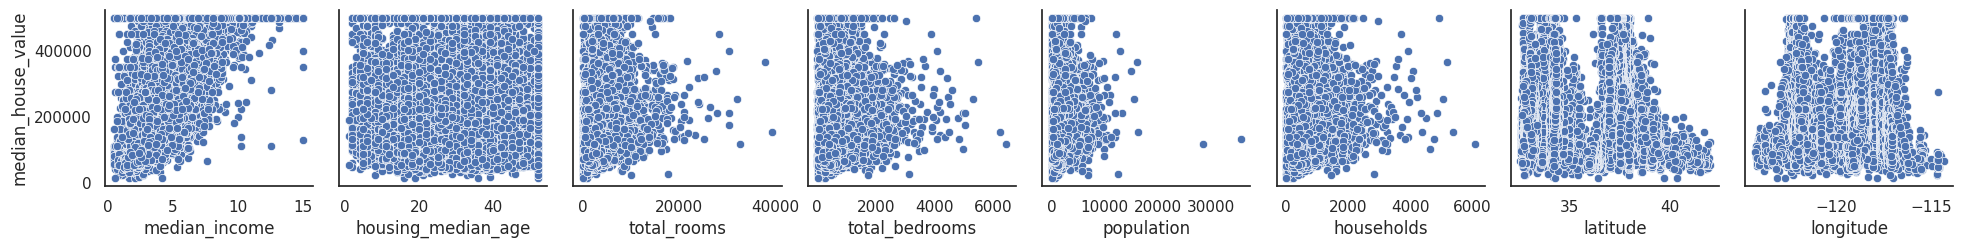

In [ ]:
sns.pairplot(houses, x_vars=houses.columns[1:], y_vars='median_house_value', kind='scatter', diag_kind='hist')
plt.show()


## Data Preparation
In this section you will perform feature selection, feature normalisation, and provide a rationale for your actions.

### Feature Selection
Think about which features may be useful in predicting **'median_house_value'**, are all features in the provided data set useful? Is a subset all that's needed? What techniques can you utilise to make this determination?

In [ ]:
features = ['median_house_value','median_income', 'total_rooms', 'latitude', 'longitude', 'population']

### Feature Normalisation

---


Think about what normalisation/standardisation methods you should apply to the dataset given what you understand about the raw data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
houses_filtered = houses[features]
houses_normalized = scaler.fit_transform(houses_filtered)
houses_normalized_df_feature_selection= pd.DataFrame(houses_normalized, columns=features)

houses_normalized_df_feature_selection

,median_house_value,median_income,total_rooms,latitude,longitude,population
0,0.902266,0.539668,0.022331,0.567481,0.211155,0.008941
1,0.708247,0.538027,0.180503,0.565356,0.212151,0.067210
2,0.695051,0.466028,0.037260,0.564293,0.210159,0.013818
3,0.672783,0.354699,0.032352,0.564293,0.209163,0.015555
4,0.674638,0.230776,0.041330,0.564293,0.209163,0.015752
...,...,...,...,...,...,...
20635,0.130105,0.073130,0.042296,0.737513,0.324701,0.023599
20636,0.128043,0.141853,0.017676,0.738576,0.312749,0.009894
20637,0.159383,0.082764,0.057277,0.732200,0.311753,0.028140
20638,0.143713,0.094295,0.047256,0.732200,0.301793,0.020684


### Rationale
***Feature Selection:***
- '**median_income**' has a strong positive linear correlation (0.688075) with 'median_house_value.' This suggests that as median income increases, median house value tends to increase. This is a strong candidate for inclusion in my model, as it appears to have a substantial impact on predicting median_house_value.

- '**latitude**' (-0.144160) and '**longitude**' (-0.05) have very weak correlations but according to domain knowledge Location is the single most important driving force for the value of a house. [1]

- I incorporated '***total_rooms***' and '***population***' as key variables, based on the premise that houses with a greater number of rooms and those situated in more populated areas generally command higher prices.[2][3] This decision was informed by domain expertise. Notably, the correlation matrix was less helpful in guiding this choice, particularly for total_rooms. Anomaly detection revealed a substantial number of outliers for both of these features, which skewed the correlation matrix and consequently, masked its true relationship with housing prices. Conversely, the positive correlation between population density and house value is more apparent and aligns with conventional real estate trends, emphasizing the demand factor in densely populated regions.

***Feature Normalisation:***

I normalised my data using MinMaxScaler primarily because of the characteristics of the data, particularly its outliers. MinMaxScaler is an effective tool under such conditions for several reasons:

1- MinMaxScaler is adept at maintaining the original distribution of the data. This is crucial as it ensures that the transformation adjusts the values to a specified range without distorting their relative distributions.

2- The presence of numerous outliers in the dataset, as revealed by my prior outlier detection analysis, necessitates a normalization approach that can manage these effectively. MinMaxScaler is particularly suitable in this context because it can handle datasets with varying scales and significant outliers, ensuring a more uniform and consistent scaling across the entire dataset. [4]


## Train, Validate, Test Split
In this section you will perform a train, validate, test split utilisation the knowledge learned in class and provide a rationale for your actions.

### Perform Data Split
Utilise the information from class or online to split your data into train, validate, and test partitions.

In [ ]:
from sklearn.model_selection import train_test_split

X = houses_normalized_df_feature_selection.drop('median_house_value', axis=1)
y = houses_normalized_df_feature_selection['median_house_value']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_valid.shape, y_valid.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (12384, 5) (12384,)
Validation set: (4128, 5) (4128,)
Test set: (4128, 5) (4128,)


### Rationale

I partitioned my dataset into three segments: 60% for training, 20% for validation, and 20% for testing. This decision aligns with the recommendations of Kumar (2021), as cited by Mulaina (2022) [5], emphasizing the importance of such a division to prevent overfitting and minimize model selection bias. Kumar underscores that the training set should comprise the majority of the data. Both the validation (or development) set and the testing set can be allocated equal, but smaller, proportions.

Mulaina (2022)[5] further elaborates on Kumar's guidelines, noting that for datasets sized between 100 and 1,000,000 records, a split ratio of 60:20:20 is optimal, allocating 60% for training, and 20% each for development and testing. However, for exceptionally large datasets exceeding 1 million entries, a different ratio, such as 98:1:1 or 99:0.5:0.5, is recommended.

Given that my dataset falls within the specified range, I opted for the 60:20:20 split, in line with these expert insights. This approach ensures a balanced distribution of data across the training, validation, and testing phases, facilitating a more robust and reliable model development process.


## Metric Selection
In this section your will make appropriate metric selection for analysing your models and provide a rationale.

### Select Appropriate Metrics
Think about the models you are building, and what the appropriate metrics and scoring should be for those models.




1) Root Mean Squared Error

2) Mean Absolute Error

3) R-squared


### Rationale
Provide a rationale for your metrics and scoring selection.

-  **The Mean absolute error (MAE):**

      Represents the average of the absolute difference between the actual and predicted values in the dataset.

      Because my dataset has a lot of outliers, MAE may be a more robust metric compared to RMSE. MAE is less sensitive to extreme values because it takes the absolute difference between the predicted and actual values. Outliers won't heavily influence the overall error, making MAE more resistant to the impact of extreme values.

      In model evaluation, a lower Mean Absolute Error (MAE) is indicative of better performance. This will aid in comparison of my models.



-  **Root Mean Squared Error (RMSE):**

      RMSE is the square root of Mean Squared error. It measures the standard deviation of residuals. RMSE squares the errors, which gives more weight to large errors. This makes RMSE more sensitive to outliers, and a single large error can significantly impact the overall RMSE.

      Even though MAE is better for outliers, I also chose to evaluate my models with RMSE to understand the impact of outliers on the overall performance.

      In model evaluation, a lower RMSE is also indicative of better performance. This will aid in comparison of my models.

- **R-squared:**

  R-squared evaluates the scatter of the data points around the fitted regression line. [6]

  R2 can be particularly useful for comparing different models or assessing the improvement of a model compared to a baseline model.
  
  Higher R-squared values represent smaller differences between the observed data and the fitted values. This indicates that a higher R2 is more favourable. [7]



## Machine Learning Model 1
In this section your will select an appropriate machine learning model for predicting **'median_house_value'**, apply it to the dataset to perform this prediction on the test set created in the Train, Validate, Test Split section, and comment on the predictive ability of the model you selected.

### Select and Build a Machine Learning Model 1
Think about the task at hand, and select an appropriate model to build on the train and validate data. Try different sets of hyper-parameters to improve your model.

In [ ]:
from sklearn.linear_model import LinearRegression

M1 = LinearRegression()

M1.fit(X_train, y_train)

LinearRegression()

In [ ]:
M1.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
M1.score(X_train, y_train)

0.6009936125572131

In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

param_dist = {
    'positive': [True, False]
}
grid_search = GridSearchCV(
    M1, param_dist,
    cv=10, scoring='r2'
)
grid_search.fit(X_train, y_train)
best_model_score = grid_search.best_estimator_.score(X_test, y_test)
print(M1.get_params())
print(M1.score(X_train, y_train))

print(grid_search.best_estimator_.get_params())
print(best_model_score)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
0.6009936125572131
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
0.6087482181219774


### Use Model 1 to Predict on Test Data
Use the model you've trained to predict **'median_house_value'** on the test data.

In [ ]:
y_pred = M1.predict(X_test)

In [ ]:
r2_score = M1.score(X_test, y_test)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Scores with test set:')
print(f'R2 Score: {r2_score}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


Scores with test set:
R2 Score: 0.6087482181219774
MAE: 0.11183338274041049
RMSE: 0.15101610931785525


In [ ]:
y_pred_valid = M1.predict(X_valid)
r2_score = M1.score(X_valid, y_valid)

mae = mean_absolute_error(y_valid, y_pred_valid)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred_valid))

print('Scores with validation set:')
print(f'R2 Score: {r2_score}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


Scores with validation set:
R2 Score: 0.5845110450404261
MAE: 0.11191862130688426
RMSE: 0.15184394541572022


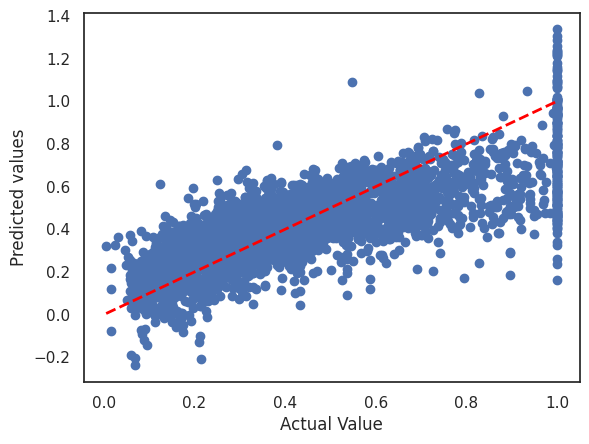

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted values')
plt.show()

### Rationale for Linear Regression (M1)
Provide a rationale for model

Linear Regression


If the relationships between the input features and the target variable are linear or can be reasonably approximated as linear, linear regression tends to perform well. [8]

 Considering my correlation matrix, the only strong linear relationship I have of the features I used is median_income, that is why I think linear_regression won't perform as good as my other features. Some reasons I used Linear Regression is because it is simple to implement and does not have a lot of hyperparameters to tune. [10] It can also be a good baseline to compare my models.


For the hyperparameters of linear regression, I looked at the documentation in scikitlearn [9] and read about the 4 parameters that linear_regression has and out of the 4 the only one that was an actual hyperparameter is the 'positive' hyperparameter. When I looked further into it, I wanted to explore and plot the different values for  random_state  as that can change. But I realised it only goes between two values 0.4874220798456207 and 0.6087482181219774. So I decided to use random_state = 42.


To tune the hyperparameter 'positive', I used both gridsearch. [12]

In the end tuning the hyperparameters my r2 scores were:

Before: 0.6009936125572131

After: 0.6087482181219774

It only changed very slightly but did not change any of the hyperparameters, the default for the parameter 'positive' being false was already the optimal solution. When I looked into this I realised its due to the randomness introduced by the cross-validation process so it's not really improving my model.

Using GridSearch was not necessary as it was only one hyperparameter, but it taught me how to work with GridSearch. Looking back at it, I realised 'positive' was not a hyperparameter and linear regression in general does not need hyperparameter tuning as it has none. This trial and error method was useful to tune my other models and to understand hyperparameters in general.



### Comment on Predictive Ability for Linear Regression (M1)
Think about the metrics and scoring received from the training and testing components. Think about the generalisability and quality of your results.


**(Quality) Metrics and Scoring**
1. R^2 Score (0.6087):

  The model achieved an R^2 score of 0.6087, which indicates it explains approximately 60.87% of the variance in the target variable. In the context of my project, this is considered suboptimal, especially when compared to the performance of other models I've developed. An R^2 score closer to 1 would indicate a stronger model, so there's room for improvement here.

2. MAE (0.1118):

  The MAE for this model is 0.1118. In general, a lower MAE signifies better predictive accuracy. Given that the scale of my normalized dataset ranges from 0 to 1, an average error of 0.1118 per prediction suggests moderate accuracy. While not extremely high, this error margin is significant in the context of my dataset's scale and indicates potential areas for refinement, especially in comparison to the MAE values from other models in my study.

3. Root Mean Squared Error (RMSE) (0.1510):

  The RMSE of the model is 0.1510. RMSE, like MAE, measures average prediction error but places greater emphasis on larger errors. Since the value is higher than the MAE (0.1510 vs. 0.1118) and considering the scale of 0 to 1 in my normalized dataset, it indicates that my model is particularly sensitive to larger errors. This discrepancy between RMSE and MAE suggests a presence of some significant outliers in the predictions, which might be distorting the overall error metric. It's an indication that while the model performs moderately on average, it struggles with consistent accuracy across all predictions.


**Generalisability**

In assessing the generalizability of my model M1, which refers to its robustness and effectiveness when applied to different datasets beyond those used in training and testing [14], I analyzed its performance on both a test set and a validation set. The following are the key metrics and their implications:

1. ***R^2 Score:***

  **Test Set:** 0.6087

  **Validation Set:** 0.5845

  The decrease in the R^2 score from 0.6087 on the test set to 0.5845 on the validation set indicates a reduction in the model's ability to explain the variability in the validation set compared to the test set. This is a marginal decrease and still indicates a good generalisability.

2. MAE (Mean Absolute Error):

  **Test Set:** 0.1118

  **Validation Set:** 0.1119

  The MAE shows a very slight increase from 0.1118 on the test set to 0.1119 on the validation set. This minimal change in the MAE indicates that the average error M1 makes on the validation set is almost identical to that on the test set. This consistency in performance regarding the average magnitude of errors across different datasets is a positive aspect of the model's generalizability.

3. RMSE (Root Mean Square Error):

  **Test Set:** 0.1510

  **Validation Set:** 0.1518

  The RMSE experiences a small increase from 0.1510 on the test set to 0.1518 on the validation set. This increase, while marginal, suggests that the accuracy of M1's predictions is slightly lower on the validation set. However, the small magnitude of this increase indicates that the model maintains a relatively consistent performance level in terms of prediction accuracy across different datasets.

In summary, model M1 demonstrates good generalizability, with its performance metrics showing only slight variations when applied to the validation set compared to the test set.


## Machine Learning Model 2
In this section your will select an appropriate machine learning model for predicting **'median_house_value'**, apply it to the dataset to perform this prediction on the test set created in the Train, Validate, Test Split section, and comment on the predictive ability of the model you selected.

### Select and Build a Machine Learning Model 2
Think about the task at hand, and select an appropriate model to build on the train and validate data. Try different sets of hyper-parameters to improve your model.

In [ ]:
from sklearn.svm import SVR

M2 = SVR()

M2.fit(X_train, y_train)
print('Parameters(SVR) = ', M2.get_params())

print('R^2(SVR) = ', M2.score(X_test, y_test))

Parameters(SVR) =  {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
R^2(SVR) =  0.7000138383927506


In [ ]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': uniform(1, 100),
    'epsilon': uniform(1e-3, 1),
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4, 1e-5]
    }

random_search = RandomizedSearchCV(M2, param_dist, n_iter=10, cv=3, scoring='r2', verbose=10, n_jobs=1)
random_search.fit(X_train, y_train)
print("Best Hyperparameters:", random_search.best_params_)
best_model_M2 = random_search.best_estimator_
best_model_score = best_model_M2.score(X_test, y_test)
print("Best Model Score:", best_model_score)
y_pred = best_model_M2.predict(X_test)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START C=14.681760051948444, epsilon=0.9806611681811515, shrinking=False, tol=0.0001
[CV 1/3; 1/10] END C=14.681760051948444, epsilon=0.9806611681811515, shrinking=False, tol=0.0001;, score=-0.204 total time=   0.0s
[CV 2/3; 1/10] START C=14.681760051948444, epsilon=0.9806611681811515, shrinking=False, tol=0.0001
[CV 2/3; 1/10] END C=14.681760051948444, epsilon=0.9806611681811515, shrinking=False, tol=0.0001;, score=-0.201 total time=   0.0s
[CV 3/3; 1/10] START C=14.681760051948444, epsilon=0.9806611681811515, shrinking=False, tol=0.0001
[CV 3/3; 1/10] END C=14.681760051948444, epsilon=0.9806611681811515, shrinking=False, tol=0.0001;, score=-0.188 total time=   0.0s
[CV 1/3; 2/10] START C=26.47433358298128, epsilon=0.9246453596548876, shrinking=False, tol=1e-05
[CV 1/3; 2/10] END C=26.47433358298128, epsilon=0.9246453596548876, shrinking=False, tol=1e-05;, score=-0.204 total time=   0.0s
[CV 2/3; 2/10] START C=

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [20, 40, 50],
    'epsilon': [0.001, 0.005, 0.1, 1],
}

grid_search = GridSearchCV(M2, param_grid, cv=3,verbose=2)

grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", grid_search.best_params_)
best_model_M2 = grid_search.best_estimator_
best_model_score = best_model_M2.score(X_test, y_test)
print("Best Model Score:", best_model_score)
y_pred = best_model_M2.predict(X_test)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ................................C=20, epsilon=0.001; total time=  15.9s
[CV] END ................................C=20, epsilon=0.001; total time=  14.0s
[CV] END ................................C=20, epsilon=0.001; total time=  13.6s
[CV] END ................................C=20, epsilon=0.005; total time=  13.0s
[CV] END ................................C=20, epsilon=0.005; total time=  12.2s
[CV] END ................................C=20, epsilon=0.005; total time=  14.4s
[CV] END ..................................C=20, epsilon=0.1; total time=   8.6s
[CV] END ..................................C=20, epsilon=0.1; total time=   3.9s
[CV] END ..................................C=20, epsilon=0.1; total time=   6.3s
[CV] END ....................................C=20, epsilon=1; total time=   0.0s
[CV] END ....................................C=20, epsilon=1; total time=   0.0s
[CV] END ....................................C=2

### Use Model 2 to Predict on Test Data
Use the model you've trained to predict **'median_house_value'** on the test data.

In [ ]:
y_pred = best_model_M2.predict(X_test)
y_pred_before = M2.predict(X_test)


In [ ]:
r2_score = M2.score(X_test, y_test)

mae = mean_absolute_error(y_test, y_pred_before)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_before))

print('Scores before tuning the hyperparameters:')
print(f'R2 Score: {r2_score:.4f}')
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

Scores before tuning the hyperparameters:
R2 Score: 0.7000
MAE: 0.0928
RMSE: 0.1322


In [ ]:
r2_score = best_model_M2.score(X_test, y_test)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Scores after tuning the hyperparameters:')
print(f'R2 Score: {r2_score:.4f}')
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')


Scores after tuning the hyperparameters:
R2 Score: 0.7241
MAE: 0.0891
RMSE: 0.1268


In [ ]:
y_valid_pred = best_model_M2.predict(X_valid)
r2_score = M2.score(X_valid, y_valid)

mae = mean_absolute_error(y_valid, y_valid_pred)

rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

print('Scores after tuning the hyperparameters (using the validation set):')
print(f'R2 Score: {r2_score:.4f}')
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

Scores after tuning the hyperparameters (using the validation set):
R2 Score: 0.6785
MAE: 0.0894
RMSE: 0.1279


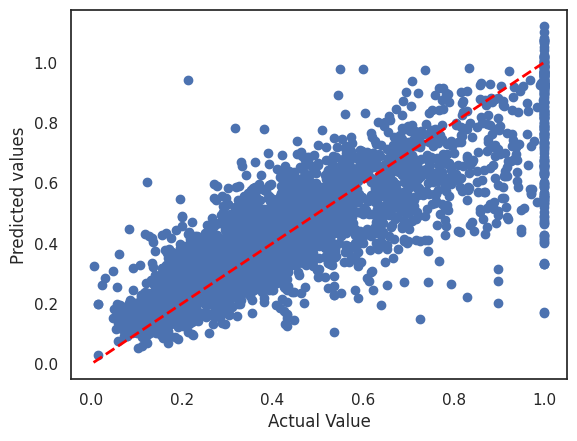

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted values')
plt.show()

### Rationale
Provide a rationale for model



I chose SVR as my second machine learning model because it can capture non-linear relationships in the data [11]. Specifically, from examining my correlation matrix, I found that features like **latitude/longitude** and **total_rooms/population** have non-linear relationships. While they are correlated, the relationship does not follow a straight line due to outliers and the complex interactions between these variables.

---
### Hyperparameter tuning

**Random Search**


For hyperparameter tuning, I used the RandomSearchCV library. Taking into consideration that an epsilon between 1-e3 and 1 is generally recommended [13], I used a range between 1e-3 and 1. Considering C that is too large will simply overfit the training data, and it is generally recommended that a good hyperparameter space would be between 1 and 100, I tuned my C parameter to be between the range of 1 and 100.[13] The other values, shrinking and tol are generally used to tune SVR. Adding additional hyperparameteres proved to be unfeasible given the time and computational constraints.

The hyperparameters before tuning with RandomSearch:

{'C': 1.0, 'epsilon': 0.1,  'shrinking': True, 'tol': 0.001}

R^2 score before: 0.7000138383927506

The best hyperparameters my randomsearch model chose:

{'C': 92.49140763191667, 'epsilon': 0.170121853551786, 'shrinking': True, 'tol': 0.0001}

***Best Model Score: 0.7078377917746268***


- In future projects, I'm interested in experimenting with the number of cross-validations (CV) and increasing the number of iterations to potentially improve my results. If time permits, I would also consider plotting the number of iterations against their outcomes to identify the optimal iteration count. This would enable me to investigate the presence of overfitting or underfitting in the model.  For this current project, though, I decided to use lower values due to the computational constraints of Google Colab and the time available to me.


**Grid Search**

Given the results, I decided to utilize GridSearch to experiment with the 'C' and 'epsilon' parameters. Although the improvements were marginal, these parameters showed the most substantial impact on my model's performance.


The results of my gridsearch:

Best Hyperparameters: {'C': 50, 'epsilon': 0.1}

***Best Model Score: 0.7240503498951278***

- The 'C' and 'epsilon' parameters significantly influenced my model, leading to a notable enhancement in its performance.

**Scores before tuning the hyperparameters:**

R2 Score: 0.7000

MAE: 0.0928

RMSE: 0.1322

**Scores after tuning the hyperparameters:**

R2 Score: 0.7241

MAE: 0.0891

RMSE: 0.1268

Tuning the hyperparameters gave me an increase in performance across all metrics.






### Comment on Predictive Ability
Think about the metrics and scoring received from the training and testing components. Think about the generalisability and quality of your results.

**(Quality) Metrics and Scoring**

1. R^2 Score (0.7241):

 The model achieved an R^2 score of 0.7241, indicating it explains about 72.41% of the variance in the target variable. This score represents a more robust model performance compared to the previous R^2 score of 0.6087. An R^2 score closer to 1 is always preferable, and in this case, the increase to 0.7241 suggests a significant improvement in the model's ability to predict the target variable accurately, though there still remains some room for enhancement.

2. MAE (0.0891):

  The model's MAE is 0.0891. This lower MAE, when compared to the previous 0.1118, indicates a heightened level of predictive accuracy. On the scale of 0 to 1 for the normalized dataset, an average error of 0.0891 per prediction points to a better accuracy level. This improvement is noteworthy in the context of my dataset and shows a marked refinement in the model's predictive capabilities, reducing the average error margin significantly.

3. RMSE (0.1268):

  The smaller gap between RMSE and MAE in this version (difference between 0.1268 and 0.0891) further indicates a reduction in significant outliers and a more consistent accuracy across various predictions. This demonstrates the model's improved reliability in predicting outcomes across the board.


**Generalisability**


 Generalizability of a model is defined as a measure of its successful application to data sets other than the one used for training and testing  [14] To test the generalisability of my SVR model , I decided to test my model on my validation set.

1. ***R^2 Score***:

  **Test Set**: 0.7241

  **Validation Set**: 0.6785

  The decrease from 0.7241 to 0.6785 in R^2 score indicates a notable drop in the model's ability to explain the variability in my validation set compared to the test set. This suggests that while the model performs well, it may not capture all the nuances present in different datasets. The decrease, though significant, doesn't necessarily undermine the model's utility, but it does signal a potential overfitting to the test set or under-representation of certain patterns in the training data. This indicates a poor performance in my models generalisability.

2. ***MAE (Mean Absolute Error)***:

  **Test Set**: 0.0891

  **Validation Set**: 0.0894

  The marginal increase in MAE, from 0.0891 to 0.0894, suggests that the average error made by M2 on the validation set is only slightly higher than on the test set. This is a good sign, as it indicates consistent performance across different datasets in terms of average error magnitude.


3.  ***RMSE (Root Mean Square Error)***:

  **Test Set**: 0.1268

  **Validation Set**: 0.1279

  Similar to the MAE, the RMSE shows a marginal increase when moving from the test set to the validation set. An increase from 0.1268 to 0.1279 in RMSE implies that the model's predictions are slightly less accurate on the validation set. However, this increase is not substantial, indicating that the model maintains a relatively consistent level of performance in terms of prediction error.


  Overall, M2 shows good generalizability, with only a slight decrease in performance when applied to the validation set. However, the noticeable reduction in the R^2 score when transitioning from the test set to the validation set warrants further examination. This decrease might indicate potential overfitting issues, where the model is too closely tailored to the patterns and noise in the training set, potentially compromising its ability to generalize to new, unseen data effectively. Addressing this potential overfitting could involve re-evaluating the model's complexity, incorporating a more diverse range of data in the training process, or employing techniques like cross-validation to better gauge the model's performance across different subsets of the data.

## Machine Learning Model 3
In this section your will select an appropriate machine learning model for predicting **'median_house_value'**, apply it to the dataset to perform this prediction on the test set created in the Train, Validate, Test Split section, and comment on the predictive ability of the model you selected.

### Select and Build a Machine Learning Model 3
Think about the task at hand, and select an appropriate model to build on the train and validate data. Try different sets of hyper-parameters to improve your model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
M3 = RandomForestRegressor()

M3.fit(X_train, y_train)
print('Parameters(SVR) = ', M3.get_params())
print('R^2(SVR) = ', M3.score(X_test, y_test))

Parameters(SVR) =  {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
R^2(SVR) =  0.8260564727630119


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

random_search = RandomizedSearchCV(M3, param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=1)
random_search.fit(X_train, y_train)
print("Best Hyperparameters:", random_search.best_params_)
best_model_M3 = random_search.best_estimator_
best_model_score = best_model_M3.score(X_test, y_test)
print("Best Model Score:", best_model_score)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time= 1.4min
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time= 1.3min
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time= 1.3min
[CV] END bootstrap=False, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 2.0min
[CV] END bootstrap=False, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 2.0min
[CV] END bootstrap=False, max_depth=60, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 1.9min
[CV] END bootstrap=True, max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   7.8s
[CV] END bootstrap=True, max_depth=100, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total 

### Use Model 3 to Predict on Test Data
Use the model you've trained to predict **'median_house_value'** on the test data.

In [ ]:
y_pred_before = M3.predict(X_test)

In [ ]:
# Calculare R2 Score
r2_score = M3.score(X_test, y_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_before)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_before))

# Print results
print('Scores before hyperparameter tuning:')
print(f'R2 Score: {r2_score:.4f}')
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')


Scores before hyperparameter tuning:
R2 Score: 0.8257
MAE: 0.0654
RMSE: 0.1008


In [ ]:
y_pred = best_model_M3.predict(X_test)

In [ ]:
r2_score = best_model_M3.score(X_test, y_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print('Scores after hyperparameter tuning:')
print(f'R2 Score: {r2_score:.4f}')
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

Scores after hyperparameter tuning:
R2 Score: 0.8280
MAE: 0.0649
RMSE: 0.1001


In [ ]:
y_valid_pred = best_model_M3.predict(X_valid)

In [ ]:
r2_score = best_model_M3.score(X_valid, y_valid)

# Calculate MAE
mae = mean_absolute_error(y_valid, y_valid_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

# Print results
print('Scores after hyperparameter tuning (using validation set):')
print(f'R2 Score: {r2_score:.4f}')
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

Scores after hyperparameter tuning (using validation set):
R2 Score: 0.8174
MAE: 0.0649
RMSE: 0.1007


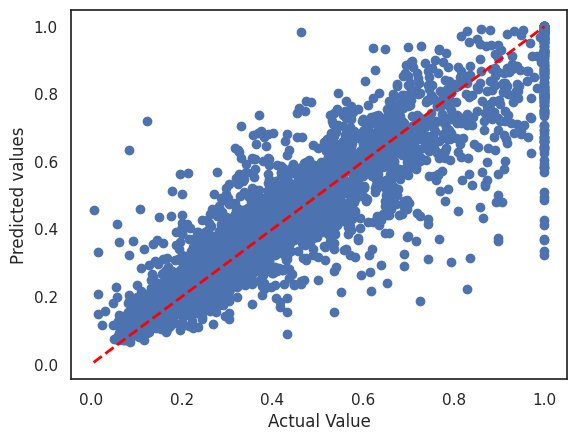

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted values')
plt.show()

### Rationale
Provide a rationale for model

 Random Forest Regression operates by constructing multiple decision trees during training and outputting the mean prediction of the individual trees. This ensemble approach makes it robust against overfitting, especially with complex datasets where relationships between variables are not simply linear. [15]  This model is better at handling outliers and less computationally intensive than SVR.

 ---
 ### Hyperparameter tuning

 **Random Search**

For hyperparameter tuning, I used the RandomSearchCV library. The parameters I tuned was bootstrap, max_depth, min_samples_leaf, min_samples_split, and n_estimators. n_estimator is the hyperparameter that defines the number of trees to be used in the model [16]. I defined a wide range of values [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]. This will help me see if a lower or higher number of trees help my model perform better. max_depth is also an important hyperparameter to tune. If the max_depth is too low, the model will be undertrained and have a high bias, leading the model to underfit. Conversely, if the max_depth is high, the model learns too much and leads to high variance, leading the model to overfit. That is why I have a wide range of values from 10 to 100. For the other values, the min_sample_split parameter specifies the smallest number of observations that must be present in a decision tree node for it to be eligible for splitting.[16] For the other hyperparameters, I just chose values based on their definitons on scitkitlearn [18] and examples of hypertuning done by other researchers.[17] There is room for improvement but it proved to be unfeasible given time and computational constraints.

**Default Parameters(SVR) =**  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**Scores before hyperparameter tuning:**

R2 Score: 0.8257

MAE: 0.0654

RMSE: 0.1008

**Best Hyperparameters:** {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}

**Scores after hyperparameter tuning:**

R2 Score: 0.8280

MAE: 0.0649

RMSE: 0.1001

The improvements in the model's performance metrics are modest. This suggests that the hyperparameter tuning had a positive but limited impact on the model's performance.

The changes in hyperparameters, particularly the increase in n_estimators to 400 and the setting of max_depth to 20, seem to have contributed positively, albeit slightly, to the model's ability to predict more accurately.

### Comment on Predictive Ability
Think about the metrics and scoring received from the training and testing components. Think about the generalisability and quality of your results.

**(Quality) Metrics and Scoring**

1. R^2 Score (0.8280):

The model achieved an R^2 score of 0.8280, which indicates it explains approximately 82.80% of the variance in the target variable. The increase to 0.8280 from my other models represents a significant enhancement in the model's predictive accuracy, demonstrating its strong capability in capturing the variance of the target variable, although there is still some scope for further improvement.

2. MAE (0.0649):

The model's Mean Absolute Error (MAE) is 0.0649. This relatively low MAE, compared to the previous model or a higher benchmark, suggests a greater level of predictive precision. In the context of a normalized dataset ( a scale of 0 to 1), an average error of 0.0649 per prediction is indicative of a high accuracy level. This improvement in MAE from other models reflects a substantial reduction in the average error margin, showing that the model's predictions are generally closer to the actual values.

3. RMSE (0.1001):

The RMSE (Root Mean Square Error) value of 0.1001, which is relatively close to the MAE, further supports the model's consistency in predictive accuracy. The smaller difference between RMSE and MAE in this model (a gap of approximately 0.0352) indicates a reduction in the impact of significant outliers. It also suggests a more uniform accuracy across different predictions, enhancing the model's reliability and consistency in predicting outcomes. This shows that the Forest Regression model is not only accurate on average (as indicated by MAE) but also maintains this accuracy across a wide range of predictions (as indicated by the close RMSE value).

**Generalisability**

 Generalizability of a model is defined as a measure of its successful application to data sets other than the one used for training and testing  [14] To test the generalisability of my Forest Regression model , I decided to test my model on my validation set.

1. ***R^2 Score***:

  **Test Set**: 0.8280

  **Validation Set**: 0.8174

The R^2 scores are quite close between the test set and the validation set, with only a slight decrease from the test to the validation set. This consistency indicates good generalizability of the model, as it shows a similar level of performance in explaining the variance of the target variable in both unseen datasets. An R^2 score above 0.80 in both sets suggests that the model reliably captures the underlying patterns in the data, maintaining its predictive accuracy across different samples.

2. ***MAE (Mean Absolute Error)***:

  **Test Set**: 0.0649

  **Validation Set**: 0.0649

The MAE being identical in both test and validation sets is a strong indicator of the model's generalizability. This consistency shows that the model has a stable average error magnitude when making predictions, regardless of the specific dataset it is applied to. A consistent MAE across different sets suggests that the model's predictive performance is reliable and can be expected to perform similarly on new, unseen data.



3.  ***RMSE (Root Mean Square Error)***:

  **Test Set**: 0.1001

  **Validation Set**: 0.1007

The RMSE values are very close between the test and validation sets, with a negligible increase in the validation set. This minimal difference indicates that the model's predictions are consistently close to the actual values and that it is equally effective at handling outliers in both sets. The slight increase in the validation set's RMSE could be due to minor variations in data or slight overfitting, but overall, the model shows good generalizability with consistent performance in error magnitude and handling of outliers.


The model demonstrates excellent generalizability, as indicated by the consistent scores across the test and validation sets in all three metrics (R^2, MAE, RMSE). The slight variations observed are within acceptable limits and do not indicate significant overfitting or underfitting. This consistency suggests that the model should perform well on new, similar datasets.

## Comparison Between Models
In this section you will comment on the difference in predictive ability between models, the difference in analysis metrics between models, and the pros/cons of each model as you understand it.

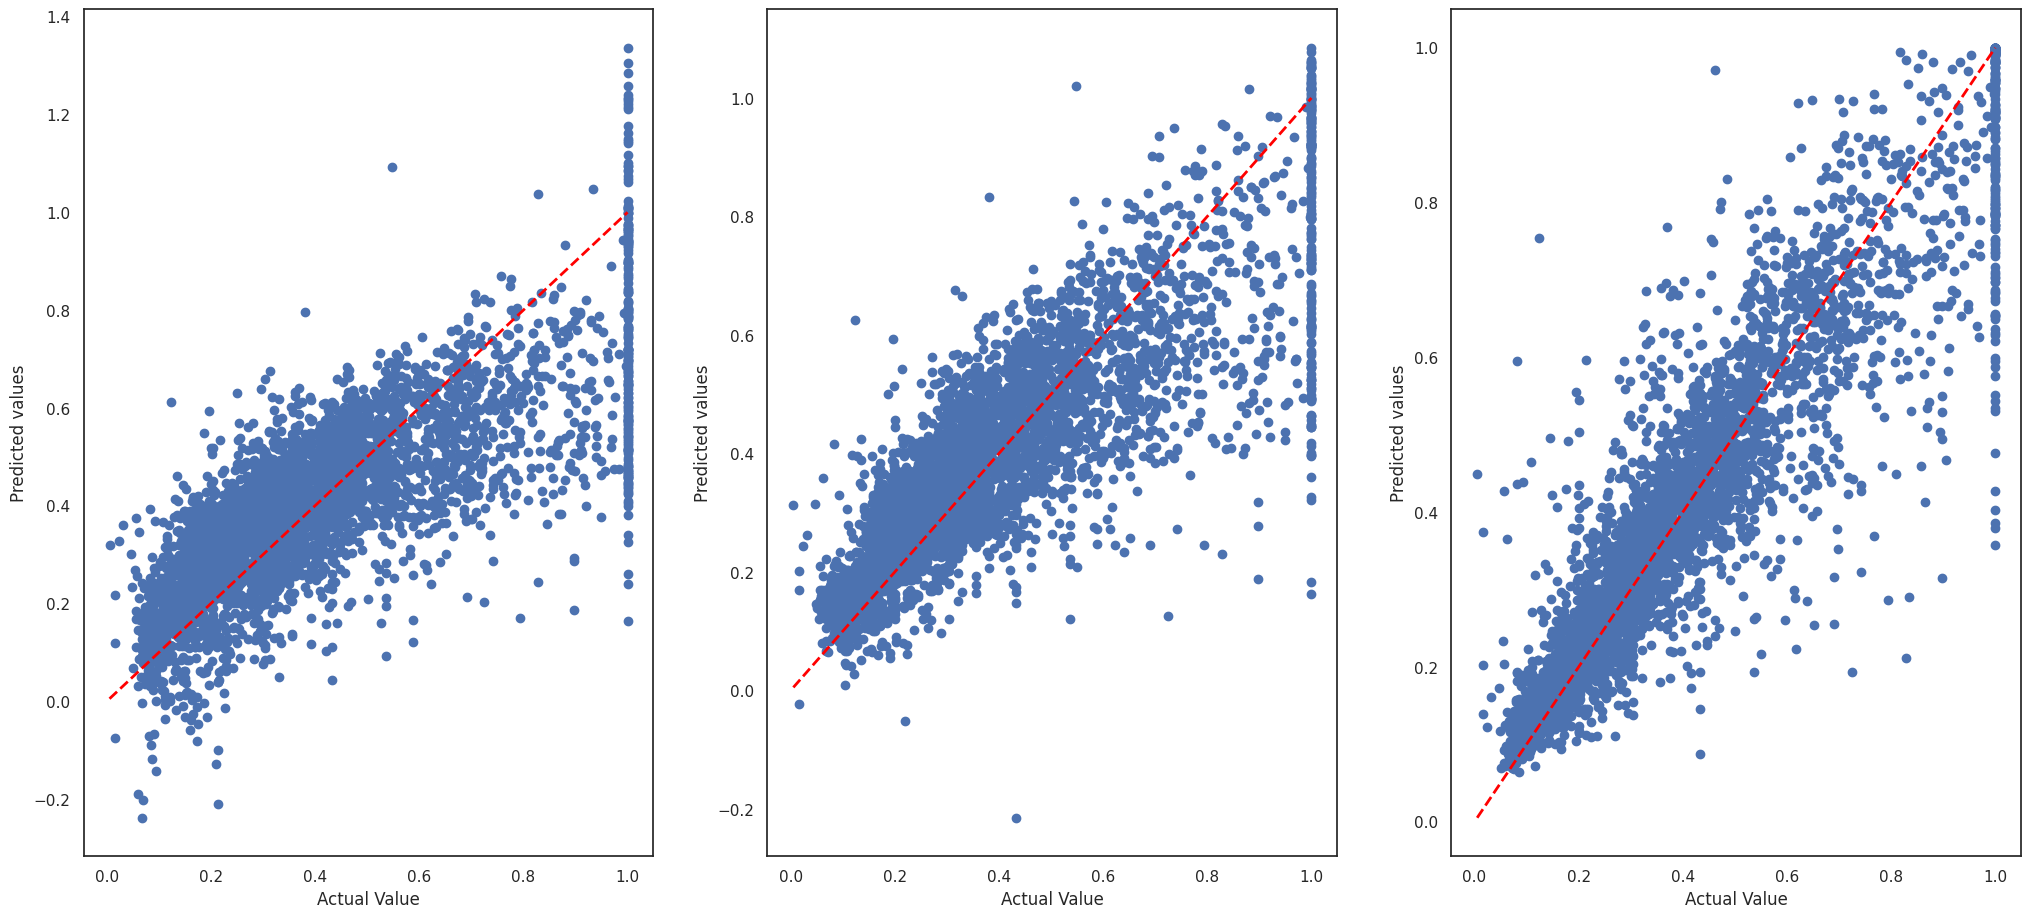

In [ ]:
figure, axs = plt.subplots(1,3, figsize=(25,11), gridspec_kw={'wspace': 0.2, 'hspace': 0.4})
y_pred = M1.predict(X_test)
axs[0].scatter(y_test, y_pred)
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
axs[0].set_xlabel('Actual Value')
axs[0].set_ylabel('Predicted values')

y_pred = M2.predict(X_test)
axs[1].scatter(y_test, y_pred)
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
axs[1].set_xlabel('Actual Value')
axs[1].set_ylabel('Predicted values')

y_pred = M3.predict(X_test)
axs[2].scatter(y_test, y_pred)
axs[2].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
axs[2].set_xlabel('Actual Value')
axs[2].set_ylabel('Predicted values')

plt.show()

### Difference in Predictive Ability and Analysis metrics
Think about what you understand if the predictive ability from each model based on scores gained, comment on the difference between each model and suggest why you believe this to be the case. Think about the analysis metrics you received from each model, comment on the use in the difference of these metrics and suggesting which model is "better" or "worse" when comparing them. Additionally comment on the difference in hyper-parameter selection between your models.


### ***Scores gained***

1. **R^2 Scores:**
- Linear Regression: 0.6087

- SVR: 0.7241

- Forest Regression: 0.8280

The R² score represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R² value indicates better model performance.

Forest Regression performs the best, explaining about 82.8% of the variance.
SVR follows, explaining 72.41%.
Linear Regression is the least effective, explaining only 60.87%.

2. **MAE (Mean Absolute Error):**
- Linear Regression: 0.1118

- SVR:  0.0891

- Forest Regression: 0.0649

MAE measures the average magnitude of the errors in a set of predictions. Lower MAE values are better.

Forest Regression has the lowest MAE, indicating it has the least average error.
SVR is in the middle.
Linear Regression has the highest MAE, suggesting larger average errors.

3. **RMSE (Root Mean Square Error):**
- Linear Regression: 0.1510

- SVR:  0.1268

- Forest Regression: 0.1001

RMSE is a quadratic scoring rule that measures the average magnitude of the error. It gives a relatively high weight to large errors. Lower RMSE values are better.

Forest Regression again performs the best, followed by SVR and Linear Regression.

Based on these metrics, Forest Regression emerges as the most effective model for my data, demonstrating the highest R^2 score and the lowest error rates (both MAE and RMSE). SVR is the second best, showing improvement over Linear Regression but not performing as well as Forest Regression. Linear Regression, while perhaps easier to implement and interpret, provides the least accurate predictions among the three models for this specific dataset.

The superior performance of Forest Regression for my dataset is due to its ability to model complex, non-linear relationships and interactions, its robustness to outliers, and its excellent generalization capabilities. SVR also performs well, particularly if the data has a non-linear structure that Linear Regression cannot capture. Considering my data contains a lot of outliers and is mostly non-linear, this was an expected result.


### **Hyperparameter selection**


The complexity of the model correlates with the number and impact of hyperparameters. Linear Regression, being the simplest model, offers limited scope for tuning. In contrast, SVR and Forest Regression provide more opportunities for improvement through hyperparameter adjustments.

Using both RandomSearch and GridSearch proved to be most effective as tuning all of the hyperparameters using gridsearch would be computationally unfeasible . This method allowed me to explore more hyperparameters.

For SVR, the significant improvements in R^2, MAE, and RMSE after tuning 'C' and 'epsilon' indicate these parameters' critical role in the model's performance.

For forest regression, the modest improvement in my model after tuning suggests that the default parameters were already quite effective for my dataset, or the dataset might not be complex enough to benefit significantly from more extensive tuning.

### **Generalisability Comparison**

The generalizability of each model - Forest Regression, SVR, and Linear Regression - can be assessed based on how well they perform on validation sets compared to their performance on test sets.

Forest Regression: Shows excellent generalizability with very consistent R^2, MAE, and RMSE scores between the test and validation sets. The slight variations observed are within acceptable limits, indicating that the model is likely to perform well on new, similar datasets without significant overfitting or underfitting.

SVR: Demonstrates good generalizability in terms of MAE and RMSE, with only slight increases when applied to the validation set. However, the noticeable drop in the R^2 score suggests some issues with its ability to generalize its predictive capabilities across different datasets. This could be a sign of overfitting to the test set or a lack of representation of certain patterns in the training data. This finding indicates a need for further model evaluation and possibly more robust training to enhance its generalizability.

Linear Regression (M1): Exhibits decent generalizability, with marginal decreases in R^2 and slight increases in MAE and RMSE on the validation set. These small variations suggest that while the model is somewhat robust in its predictions, there might be room for improvement, particularly in its ability to capture and explain the variability in different datasets.

Overall, while each model has shown strengths in certain areas, Forest Regression stands out for its strong generalizability across all considered metrics. SVR, though slightly weaker in R^2, still maintains reasonable generalizability. Linear Regression, despite being the simplest model, shows adequate generalizability, but it might benefit from further refinement to enhance its predictive performance on varied datasets.

### Pros/Cons
Think about the models and analysis metrics you've gathered, and suggest the positives and negatives of each model.

- ***Linear Regression (M1):***

  Pros

  -  Linear Regression is straightforward to implement and interpret, making it a good starting point for regression tasks.
  - It's computationally efficient, which is beneficial for large datasets or limited computational resources.
  - Advantageous for datasets that exhibit linear relationships.
  - For a primary model that is complex and applied to a large dataset, employing a basic linear regression model with limited parameters can serve as an effective baseline for comparison.

  Cons
  - It can only capture linear relationships, which is a significant limitation in datasets with complex, non-linear patterns.
  - Linear Regression is sensitive to outliers, which can significantly affect the model's performance.
  - As seen in my results, it has lower R^2, higher MAE, and higher RMSE compared to my other models, indicating less predictive accuracy.

- ***SVR (M2):***

  Pros
  - SVR can handle non-linear relationships better than Linear Regression, especially with the appropriate kernel.
  -  It is less sensitive to outliers compared to Linear Regression.
  -  Tuning hyperparameters like 'C' and 'epsilon' can significantly improve its performance.

  Cons
  - Especially for large datasets, SVR can be computationally more demanding than Linear Regression.
  - Effective use of SVR often requires careful tuning of hyperparameters, which can be time-consuming and requires a good understanding of how these parameters work.
  - As noted, SVR showed a notable drop in R^2 when moving from the test set to the validation set, indicating potential issues with generalizability.
  
- ***Forest Regressor (M3):***

  Pros
  - My results show Forest Regression as the best performer in terms of R^2, MAE, and RMSE, indicating its strong predictive ability.
  - It is capable of capturing complex, non-linear relationships and interactions.
  - Forest Regression is generally robust to outliers and variance in the data.
  - Demonstrated consistent performance across test and validation sets which shows excellent generalisability

  Cons
  - More complex than Linear Regression and SVR, making it harder to interpret.
  - Especially with a large number of trees or deep trees, it can be computationally intensive.
  - If not properly tuned (like limiting the depth of the trees), there's a risk of overfitting.

## Conclusion
In this section you will draw conclusions about the models you've selected, and efficacy of different analysis metrics you've used, and any additional comments or concerns about the models or metrics you've observed.

### Model Selection
Think about all of the information you've learned both theoretically from the slides and practically through completing this assingment about the models you've selected. What conclusions can you draw about the models, and what situations would you pick one model over another?


### **Conclusion about the models**

1. ***Linear Regression***

  Theoretically:
    - Linear Regression models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data [19] . The formula is typically:

     ℎ𝜃 (𝑥) = 𝜃0 + 𝜃1𝑥
    
    - It assumes a linear relationship between models

    - It does not have a very complex relationship and is built on a very simple algorithm.

  Practically:
   - Applying a linear regression model proved to be very easy and straightforward.
   - Linear regression models have no hyperparameters which makes them very easy to implement and removes the extra step of tuning the hyperparameters
   - Employing a basic linear regression model with limited parameters can serve as an effective baseline for comparison.[25]
   
   When to choose Linear Regression
   - This model would be a primary choice when the relationship between variables is expected to be linear and when simplicity and interpretability are key.
   - It's well-suited for problems with fewer features and when computational efficiency is important.
   - When dealing with non-linear relationships and complex interactions between features, this model would not perform best but can still be used as a baseline.
   - An example of when linear regression could be useful is to understand the effects of pollution on draught levels as the relationship is mostly linear. [26]

2. ***SVR***

  Theoretically:

  - SVR is based on the principles of Support Vector Machines. It focuses on finding a hyperplane that best fits the data in a high-dimensional space, with the goal of minimizing the error within a certain threshold. [27]

  - While logistic regression and linear regression usually handle linearly separable data, Support Vector Machines (SVMs) excel in handling non-linear data through a technique known as the kernel trick. This approach effectively maps input vectors into a higher dimensional space, adding more dimensions, thereby rearranging the dataset to become linearly solvable. [28]

  Practically:

  - Applying SVR practically was more complicated than linear regression as it contained a lot of hyperparameters to tune such as C, and epsilon but it did give better results and tuning it appeared to be more helpful.

  - Hyperparameter tuning for SVR improved it quite a lot so that might mean that the primary focus for SVR is not datasets like mine and house price predictions but it can be tuned to better work for that dataset and capability.

  - Support Vector Regression (SVR) is particularly effective when dealing with datasets that have a large number of features (high-dimensional spaces). [30]

  - SVR has good generalization capabilities as seen by my observations which can be really useful for real-world applications.

  When to choose SVR:
  - SVR is an ideal choice for complex datasets where the relationship between variables isn't strictly linear, and where the data has many features that could influence the prediction.
  - It's particularly suitable for cases where prediction accuracy is critical, and the cost of errors is high, such as in financial modeling or advanced scientific computations. [29]
  - It is important to note, SVR works best in scenarios where the computational complexity and resources required for tuning and processing are manageable.


3. ***Random Forest Regression***

  Theoretically:

  - Random Forest Regression is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the mean prediction of the individual trees. [32]

  - This method is effective in reducing overfitting, common in individual decision trees, by averaging the results across various trees. It can handle complex datasets with non-linear relationships and is capable of managing both linear and non-linear data. [32]

  - The method's strength lies in its robustness and accuracy, particularly beneficial for large, intricate datasets.

  Practically:

  - Implementing Random Forest Regression is more computationally intensive than linear models but offers high accuracy, especially with large and complex datasets.

  - Tuning the hyperparameters for Forest Regression was not very beneficial for my dataset so I can interpret that to mean the default parameters work best for datasets like mine.

  - The generalisability of Random Forest Regression is the best out of all of my models. This finding emphasizes Random Forest's strength in creating a model that not only performs well with the training data but also adapts effectively to new, unseen datasets. It underscores the algorithm's ability to capture complex patterns and relationships in the data, making it a reliable choice for applications where predictive accuracy on varied datasets is crucial.

  When to use Random Forest Regression:

  - Ideal for complex predictive problems.
  
  - Suitable for applications where model interpretability is less of a concern, and the focus is on performance and handling a variety of data types, including categorical and continuous.

  - Random Forest Regression works the best to predict future prices/costs and future revenue. That is why it performed the best with my dataset for predicting future house prices. [31]



### Analysis Metrics
Think about the metrics you've selected and what you've learned both theoretically from the slides and practically through this assignment. What conclusions can you draw about these metrics, and what situations might you pick one set of metrics over another? (Here you may comment on metrics which you have not selected in this assignment)

1. ***R^2 Score:***

  - **Theoretically**
  
  A very simplified version of how R^2 is calculated:

  `r^2 = 1 - ( Unexplained variation / Total variation)`

  This equation is measuring the model's predictive capacity on a spectrum -- with 0 being just the mean and 1 being perfection. Values closer to 1 indicate my predictions are perfection. However, we are not chasing an R^2 value of 1 as that can be an indication of an inflated value and a misleading model. [20] Values near 0 means the model gives little additional explanatory power beyond the baseline average.[19]

  - **Practically**

  Taking into consideration how an R^2 score is calculated and applying it practically.
    
  `r2_score = model.score(X_test, y_test)`

   With this equation, after the model is trained on a training set, r^2 is calculated on the test set of X and y.

  To test generalisability, we calculate it the same way but for our validation set to see how it performs.

  An R^2 value that is too high, particularly with complex models, might be indicative of overfitting. Overfitting means the model is not only capturing the underlying trend in the data but also the noise, making it less generalizable to new, unseen data. For example, in my linear regression model the generalisability was worse than the other models I have tested as seen by my application of it to my validation set. This might be an indication of overfitting and the high r^2 value might not be the most robust way of calculating my model's ability.

  Overall, while the R^2 score is a useful indicator of model performance, relying solely on this metric can be misleading. It should be interpreted with caution and in the context of other statistical measures and domain-specific knowledge.

  - **When to choose R^2**

  Choose R^2 when you're interested in understanding the proportion of variance in the dependent variable that can be predicted from the independent variable(s). It's particularly useful in modeling scenarios where you want to compare the explanatory power of different models that are usually of the same type or dataset


2. ***Mean Absolute Error (MAE):***

  - **Theoretically**

  The equation behind MAE [21]:

  `MAE = (1/n) * Σ|yi - ŷi|`
  
  MAE calculates the average of the absolute differences between predicted and actual values. This means it converts all the differences into positive values and averages them, providing a clear measure of the average prediction error in the same units as the data.

  - **Practically**
  
  To calculate mean absolute error practically, I used scikitlearns library for metrics which takes y_test and y_pred as input values and uses the same equation that I mentioned above.  [22]

  `mae = mean_absolute_error(y_test, y_pred)  `       
  
  One of the key strengths of the Mean Absolute Error (MAE) in practical scenarios is its resilience to outliers. Unlike the Root Mean Squared Error (RMSE), which squares the errors before averaging them, MAE treats all errors linearly. This means that while RMSE disproportionately increases the effect of larger errors (outliers), MAE does not amplify the impact of outliers in the same way. It simply sums the absolute values of the errors, leading to a more balanced representation of model performance, especially in datasets with significant outliers. Furthermore, since MAE is calculated in the original units of the data, it offers a direct understanding of the average error magnitude. For instance, if you are predicting house prices in thousands of dollars, an MAE of 5,000 means that on average, the predictions are off by $5,000. This is not a bad metric for house price predictions considering the range. [23]

  - **When to choose MAE**
  
  Opt for MAE in situations where the dataset contains significant outliers that you don't want to unduly influence the model's error metric. MAE is in the same units as the response variable, making it a more intuitive measure of average error. This can be particularly useful in business or presentation settings where clarity is paramount.Use MAE when you want a more balanced representation of the errors across the dataset, treating all deviations equally.



3. ***Root Mean Squared Error (RMSE):***

  - **Theoretically**

  `RMSE = sqrt [(Σ(Pi - Oi)²) / n]`

  The sum of the squared differences between the predicted and observed values is divided by the number of observations, and the square root of the result is taken to yield the RMSE. [24] [19].

  Looking at this equation, we can clearly see that this equation would heavily penalise large errors. This leads to outliers skewing the data heavily.

  - **Practically**

  To calculate root mean squared error in my code, I used scikitlearns library for metrics [22]. I used mean square error that and then used numpy to take the square it which gives me the same eqaution I mentioned above.  

  `rmse = np.sqrt(mean_squared_error(y_test, y_pred))`

  One of the primary advantages of the Root Mean Squared Error (RMSE) in predictive modeling is its sensitivity to large errors, making it particularly useful in scenarios where significant deviations are undesirable. Unlike Mean Absolute Error (MAE), which treats all errors equally, RMSE emphasizes larger errors by squaring them before averaging. This feature of RMSE means that it gives more weight to larger errors, making it a robust metric for identifying models that might have occasional but severe discrepancies. For example, in forecasting scenarios like weather prediction or stock market analysis, where large errors can have substantial implications, RMSE's sensitivity to these errors makes it a preferred choice. Additionally, RMSE is presented in the same units as the original data after taking the square root of the mean of squared errors, making it relatively interpretable. For instance, in the context of house price predictions, an RMSE of 10,000 indicates a higher variability in predictions compared to an MAE of 5,000. This heightened sensitivity to larger errors can be crucial for models where minimizing big mistakes is more critical than smaller ones.

  - **When to choose RMSE**

  Use RMSE when larger errors are particularly undesirable and should be penalized more heavily. This is common in many practical applications where large deviations have more significant consequences. RMSE is useful in cases where you need to perform sensitivity analyses, as it gives more weight to larger variances and is sensitive to the distribution of error magnitudes. In scenarios like weather forecasting or stock market prediction, where accuracy in predictions is crucial, and large errors are more impactful, RMSE provides a clearer picture of the model’s performance.









### Any Additional Conclusions
For those of you which have noticed things or made conclusions which do not neatly fit into any other section, please put them here.

References
---

[1] “The Factors of a ‘Good’ Location,” Investopedia. https://www.investopedia.com/financial-edge/0410/the-5-factors-of-a-good-location.aspx#:~:text=This%20means%20that%20location%20is

‌[2] C. Mulder, “Sixty-ninth session of the UNECE Committee on Housing and Land Management Key note presentation The relationship between population and housing.” Available: https://unece.org/fileadmin/DAM/hlm/archive/Key%20note%20population%20and%20housing.pdf


‌[3] A. Padala, “Determinants of Housing Price,” Medium, Apr. 12, 2021. https://apadala-90574.medium.com/determinants-of-housing-price-bdefc783cf6b

[4] “What is the MinMax Scaler? | Data Basecamp,” May 17, 2023. https://databasecamp.de/en/ml/minmax-scaler-en#:~:text=The%20MinMax%20Scaler%20is%20a%20popular%20feature%20scaling%20technique%20in (accessed Dec. 12, 2023)

[5] Samrat, “Splitting the Data to 60–20–20 ratio vs. 80–10–10. Which one is better?,” Medium, May 07, 2023. https://medium.com/@itsmeSamrat/splitting-the-data-to-60-20-20-ratio-vs-80-10-10-which-one-is-better-bbc3503830d8#:~:text=In%20the%20first%20experiment%2C%20we (accessed Dec. 12, 2023).

[6] J. Frost, “How To Interpret R-squared in Regression Analysis,” Statistics By Jim, 2018. https://statisticsbyjim.com/regression/interpret-r-squared-regression/

[7] R. Agrawal, “Evaluation Metrics for Your Regression Model,” Analytics Vidhya, May 19, 2021. https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/


[8] Understanding when to use linear regression (with examples), https://www.indeed.com/career-advice/career-development/when-to-use-linear-regression (accessed Dec. 12, 2023).

[9] scikit-learn developers, “sklearn.linear_model.LinearRegression — scikit-learn 0.22 documentation,” Scikit-learn.org, 2019. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

[10] K. Nyuytiymbiy, “Parameters and Hyperparameters in Machine Learning and Deep Learning,” Medium, Apr. 05, 2021. https://towardsdatascience.com/parameters-and-hyperparameters-aa609601a9ac

[11] A. Sethi, “Support Vector Regression In Machine Learning,” Analytics Vidhya, Mar. 27, 2020. https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/

[12] R. Shah, “GridSearchCV |Tune Hyperparameters with GridSearchCV,” Analytics Vidhya, Jun. 23, 2021. https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/

[13] K. Smets, B. Verdonk, and E. Jordaan, “Evaluation of Performance Measures for SVR Hyperparameter Selection.” Accessed: Dec. 12, 2023. [Online]. Available: http://adrem.uantwerpen.be/bibrem/pubs/IJCNN2007.pdf

[14] “Generalizability - an overview | ScienceDirect Topics,” www.sciencedirect.com. https://www.sciencedirect.com/topics/mathematics/generalizability#:~:text=The%20robustness%20(or%20generalizability)%20of (accessed Dec. 13, 2023)

[15] D. Schumacher, “Random Forest,” SERP AI, https://serp.ai/random-forest/ (accessed Dec. 13, 2023).

[16] “Random Forest Hyperparameter Tuning in Python,” GeeksforGeeks, Dec. 28, 2022. https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/

[17] W. Koehrsen, “Hyperparameter tuning the random forest in python,” Medium, https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 (accessed Dec. 13, 2023).

[18] scikit-learn, “3.2.4.3.2. sklearn.ensemble.RandomForestRegressor — scikit-learn 0.20.3 documentation,” Scikit-learn.org, 2018. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

[19] S. McGough, "Linear Regression," in CSC3831: Part 2, Lecture 2a. [Online]. Available: file-chCAmBkyvGDCvtA8bG9p84Sg

[20] J. Frost, “How high does R-squared need to be? ,” Statistics By Jim, May 10, 2017. https://statisticsbyjim.com/regression/how-high-r-squared/

[21] “Mean Absolute Error ~ MAE [Machine Learning(ML)],” Medium, Feb. 22, 2018. https://medium.com/@20__80__/mean-absolute-error-mae-machine-learning-ml-b9b4afc63077

[22] “3.3. Metrics and scoring: quantifying the quality of predictions,” scikit-learn. https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error

[23] “What is Mean Absolute Error,” Deepchecks. https://deepchecks.com/glossary/mean-absolute-error/

[24] “What is Root Mean Square Error (RMSE),” Deepchecks. https://deepchecks.com/glossary/root-mean-square-error/#:~:text=RMSE%20%3D%20sqrt%20%5B%CE%A3Pi (accessed Dec. 14, 2023).

[25] “What are baseline models in machine learning and why do we need them? | Censius ML Blog,” censius.ai. https://censius.ai/blogs/how-to-implement-baselines-in-ml-modeling#:~:text=Linear%20regression%3A%20If%20you (accessed Dec. 14, 2023)

[26] Understanding when to use linear regression (with examples), https://www.indeed.com/career-advice/career-development/when-to-use-linear-regression (accessed Dec. 14, 2023).

[27] I. Dixon, "Lecture 05 - Support Vector Machines (SVM)," in CSC3831, 2023.

[28] G. L. Team, “Support Vector Regression in Machine Learning | What is SVM?,” GreatLearning Blog: Free Resources what Matters to shape your Career!, Sep. 02, 2020. https://www.mygreatlearning.com/blog/support-vector-regression/

[29] B. M. Henrique, V. A. Sobreiro, and H. Kimura, “Stock price prediction using support vector regression on daily and up to the minute prices,” The Journal of Finance and Data Science, vol. 4, no. 3, pp. 183–201, Sep. 2018, doi: https://doi.org/10.1016/j.jfds.2018.04.003.

[30] S. Bangar, “Understanding Support Vector Regression: A Guide to Machine Learning’s Powerful Tool,” Medium, Sep. 09, 2023. https://medium.com/@siddheshb008/understanding-support-vector-regression-a-guide-to-machine-learnings-powerful-tool-4ada7081934b#:~:text=Advantages%20of%20Support%20Vector%20Regression (accessed Dec. 14, 2023).

[31] “The Ultimate Guide to Random Forest Regression,” www.keboola.com, Sep. 17, 2020. https://www.keboola.com/blog/random-forest-regression

[32] I. Dixon, "Lecture 06 - Trees and Random Forests," in CSC3831, Newcastle University, 2023